# Polynomial-Regression in Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# degree：为数据集添加几次方特征 The degree of the polynomial features. default = 2
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [7]:
X2.shape

(100, 3)

In [8]:
X2[:5, :]

array([[ 1.        , -1.20796179,  1.45917168],
       [ 1.        , -0.94893488,  0.90047741],
       [ 1.        ,  2.00890699,  4.03570729],
       [ 1.        ,  0.57889496,  0.33511937],
       [ 1.        , -2.01107455,  4.04442087]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

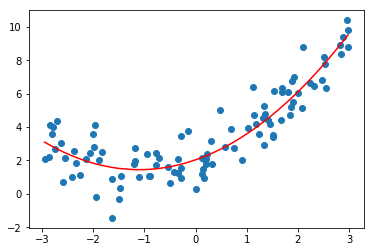

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

In [11]:
lin_reg2.coef_

array([0.        , 1.06791987, 0.48395475])

### 1. 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X.shape

(5, 2)

In [17]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
ploy = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(5, 6)

In [16]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

- 可以看到，degree = 2 时，X2是 6 列，分别为 `x_1^0x_2^0, x_1, x_2, x_1x_2,  x_1^2, x_2^2`

所以有：
[![8lmpCQ.png](https://s1.ax1x.com/2020/03/14/8lmpCQ.png)](https://imgchr.com/i/8lmpCQ)

### 2. Pipeline

- 当degree很大时，生成的数据之间差距会非常大，
- 此时需要使用归一化处理，然后再把数据送给线性回归函数
- Pipeline可以将以上三步操作合在一起

In [18]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1, size=100)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scalear", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [22]:
poly_reg.fit(X, y) # poly_reg 将会把数据依次处理
y_predict = poly_reg.predict(X)

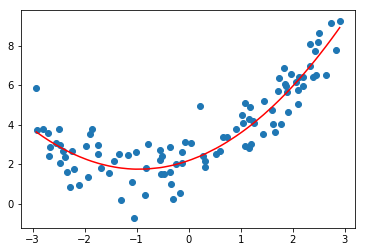

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")